Dataset shape: (303, 14)

First 5 rows:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       1  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  

Missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Dataset shape after removing missing values: (297, 14)

Dataset info:
<class 'pandas.core.

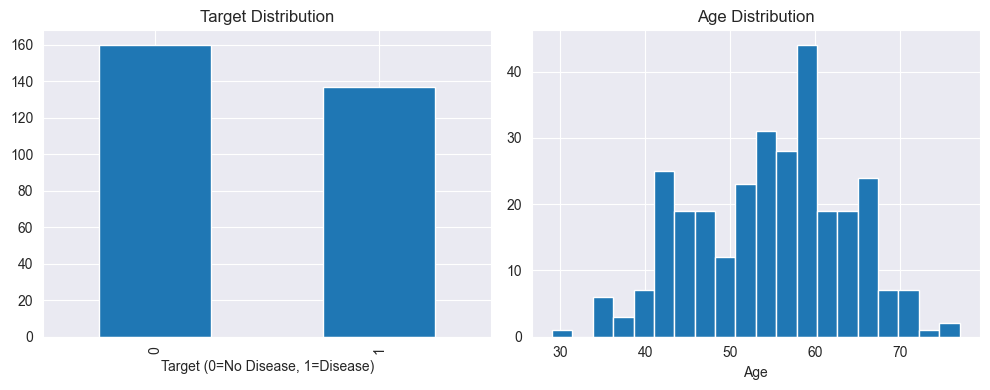

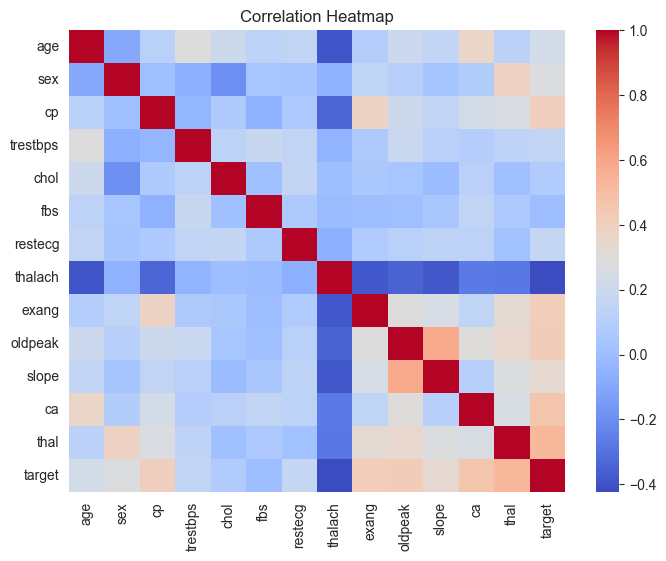


Data preprocessing completed!
Final dataset shape: (297, 14)
Cleaned data saved to ../data/processed/cleaned_data.csv


C:\Users\Youssef\AppData\Local\Temp\ipykernel_2816\4063853575.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[numerical_cols] = scaler.fit_transform(df_clean[numerical_cols])


In [1]:
# Heart Disease UCI Dataset - Data Preprocessing
# Notebook 01: Data Preprocessing & Cleaning

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import os

os.makedirs('../data/processed', exist_ok=True)
os.makedirs('../models', exist_ok=True)

# Load the dataset
# UCI Heart Disease dataset column names
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

df = pd.read_csv('../data/raw/processed.cleveland.data', names=column_names, na_values='?')

# Convert 'num' to binary 'target' (0 = no disease, 1+ = disease)
df['target'] = (df['num'] > 0).astype(int)
df = df.drop('num', axis=1)

print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Handle missing values (remove rows with missing values)
df_clean = df.dropna()
print(f"\nDataset shape after removing missing values: {df_clean.shape}")

# Info about the data
print("\nDataset info:")
print(df_clean.info())

print("\nTarget distribution:")
print(df_clean['target'].value_counts())

# Exploratory Data Analysis (EDA) with histograms, correlation heatmaps, and box plots.
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
df_clean['target'].value_counts().plot(kind='bar')
plt.title('Target Distribution')
plt.xlabel('Target (0=No Disease, 1=Disease)')

plt.subplot(1, 2, 2)
plt.hist(df_clean['age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')

plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df_clean.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Standardize numerical features (Only numerical/continuous features)
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()
df_clean[numerical_cols] = scaler.fit_transform(df_clean[numerical_cols])

print("\nData preprocessing completed!")
print("Final dataset shape:", df_clean.shape)

# Save the cleaned dataset
df_clean.to_csv('../data/processed/cleaned_data.csv', index=False)
print("Cleaned data saved to ../data/processed/cleaned_data.csv")